In [ ]:
import pandas as pd
import numpy as np

# Define the dataset
data = {
    'Attack Type': ['Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Phishing'],
    'Firewall Status': ['Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked'],
    'Malware Detected': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Data Exfiltrated': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes','No','No']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[feature] == values[i]).dropna()[target]) for i in range(len(values))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Function to print entropy and information gain for each attribute
def print_entropy_and_information_gain(df):
    target_column = 'Data Exfiltrated'
    for column in df.columns:
        if column != target_column:
            entropy_val = entropy(df[column])
            info_gain = information_gain(df, column, target_column)
            print(f'Entropy for {column}: {entropy_val}')
            print(f'Information Gain for {column}: {info_gain}')
            print()  # Add a gap between entropy and information gain

print_entropy_and_information_gain(df)


Entropy for Attack Type: 2.311278124459133
Information Gain for Attack Type: 0.30167729476412386

Entropy for Firewall Status: 0.6962122601251458
Information Gain for Firewall Status: 0.09063602084952149

Entropy for Malware Detected: 0.954434002924965
Information Gain for Malware Detected: 0.06983317322995597



Entropy and Information Gain:
Entropy for Attack Type: 2.311278124459133
Information Gain for Attack Type: 0.30167729476412386

Entropy for Firewall Status: 0.6962122601251458
Information Gain for Firewall Status: 0.09063602084952149

Entropy for Malware Detected: 0.954434002924965
Information Gain for Malware Detected: 0.06983317322995597



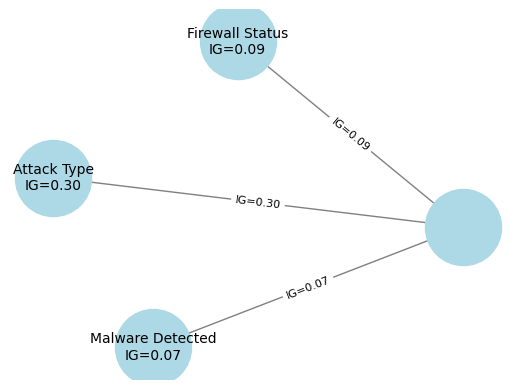


Predicted Target for Input: No


In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import pydotplus
from PIL import Image
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Attack Type': ['Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Phishing'],
    'Firewall Status': ['Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked'],
    'Malware Detected': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Data Exfiltrated': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Target': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[feature] == values[i]).dropna()[target]) for i in range(len(values))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Function to print entropy and information gain for each attribute
def print_entropy_and_information_gain(df):
    target_column = 'Data Exfiltrated'
    for column in df.columns:
        if column != target_column:
            entropy_val = entropy(df[column])
            info_gain = information_gain(df, column, target_column)
            print(f'Entropy for {column}: {entropy_val}')
            print(f'Information Gain for {column}: {info_gain}')
            print()  # Add a gap between entropy and information gain

print("Entropy and Information Gain:")
print_entropy_and_information_gain(df)

# Create a basic decision tree flowchart
def create_decision_tree_graph(df):
    G = nx.DiGraph()

    # Define nodes and edges based on information gain
    for column in df.columns:
        if column != 'Target':
            info_gain = information_gain(df, column, 'Target')
            G.add_node(column, label=f'{column}\nIG={info_gain:.2f}')

    for column in df.columns:
        if column != 'Target':
            info_gain = information_gain(df, column, 'Target')
            G.add_edge(column, 'Target', label=f'IG={info_gain:.2f}')

    return G

decision_tree_graph = create_decision_tree_graph(df)

# Draw and save the decision tree graph
pos = nx.spring_layout(decision_tree_graph)
labels = nx.get_node_attributes(decision_tree_graph, 'label')
edge_labels = nx.get_edge_attributes(decision_tree_graph, 'label')

nx.draw_networkx_nodes(decision_tree_graph, pos, node_color='lightblue', node_size=3000)
nx.draw_networkx_edges(decision_tree_graph, pos, edgelist=decision_tree_graph.edges(), edge_color='gray')
nx.draw_networkx_labels(decision_tree_graph, pos, labels=labels, font_size=10, font_color='black')
nx.draw_networkx_edge_labels(decision_tree_graph, pos, edge_labels=edge_labels, font_size=8, font_color='black')

plt.axis('off')
plt.savefig("decision_tree.png", format="PNG", dpi=300)
plt.show()

# Predict an unknown target
def predict_target(attack_type, firewall_status, malware_detected):
    if malware_detected == 'No':
        return 'No'
    elif attack_type == 'Malware':
        return 'Yes'
    elif firewall_status == 'Blocked':
        return 'Yes'
    else:
        return 'No'

# Provide input for prediction
unknown_attack_type = 'Malware'
unknown_firewall_status = 'Blocked'
unknown_malware_detected = 'No'

predicted_target = predict_target(unknown_attack_type, unknown_firewall_status, unknown_malware_detected)
print(f'\nPredicted Target for Input: {predicted_target}')


<ipython-input-17-e81b6961e261>:46: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


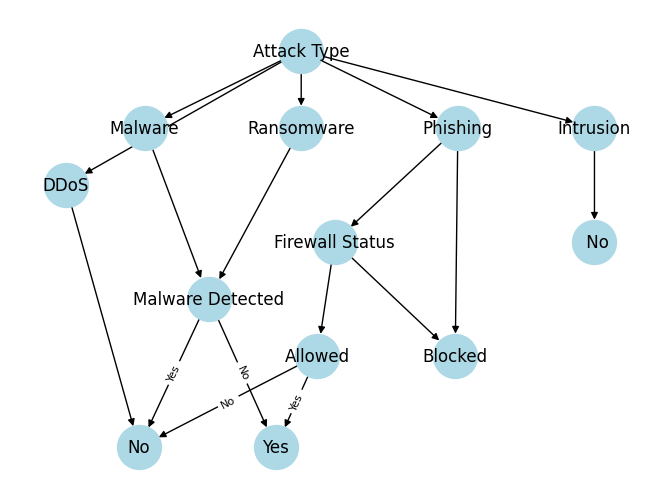

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pydotplus
from PIL import Image
from networkx.drawing.nx_pydot import graphviz_layout

# Create a directed graph
G = nx.DiGraph()

# Add nodes
G.add_node("Attack Type")
G.add_node("DDoS")
G.add_node("Intrusion")
G.add_node("Malware")
G.add_node("Ransomware")
G.add_node("Phishing")
G.add_node("Malware Detected")
G.add_node("Firewall Status")
G.add_node("Malware Detected")
G.add_node("Allowed")
G.add_node("Blocked")


# Add edges with labels
G.add_edge("Attack Type", "DDoS")
G.add_edge("DDoS" , "No")
G.add_edge("Attack Type", "Intrusion")
G.add_edge("Intrusion" , " No")
G.add_edge("Attack Type", "Malware")
G.add_edge("Malware", "Malware Detected")
G.add_edge("Malware Detected", "Yes", label="Yes")
G.add_edge("Malware Detected", "No", label="No")
G.add_edge("Attack Type", "Phishing")
G.add_edge("Phishing", "Firewall Status")
G.add_edge("Firewall Status", "Allowed")
G.add_edge("Allowed", "Yes", label="Yes")
G.add_edge("Allowed", "No", label="No")
G.add_edge("Firewall Status", "Blocked")
G.add_edge("Phishing", "Blocked")
G.add_edge("Attack Type", "Ransomware")
G.add_edge("Ransomware", "Malware Detected")
G.add_edge("Malware Detected", "Yes", label="No")
G.add_edge("Malware Detected", "No", label="Yes")

# Specify node positions
pos = graphviz_layout(G, prog='dot')

# Draw nodes and edges with labels
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Save the graph as an image
plt.savefig("flowchart.png", format="PNG", dpi=300)
plt.show()

# Display the image
img = Image.open("flowchart.png")
img.show()


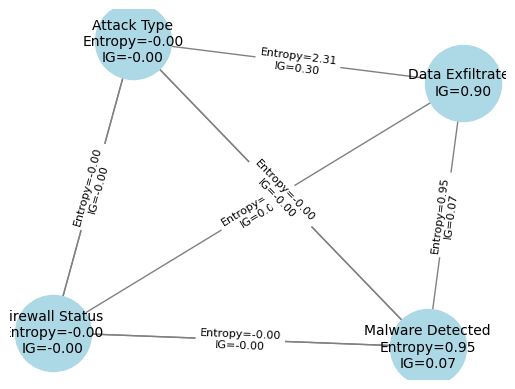


Predicted Target for Input: No


In [ ]:
import pandas as pd
import numpy as np
import random
import networkx as nx
import pydotplus
from PIL import Image
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Attack Type': ['Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Malware', 'Phishing', 'DDoS', 'Ransomware', 'Intrusion', 'Phishing'],
    'Firewall Status': ['Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked', 'Allowed', 'Blocked', 'Blocked', 'Blocked', 'Blocked'],
    'Malware Detected': ['Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No'],
    'Data Exfiltrated': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No'],
    'Target': ['No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No']
}

df = pd.DataFrame(data)

def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy_val = -np.sum([(counts[i] / np.sum(counts)) * np.log2(counts[i] / np.sum(counts)) for i in range(len(elements))])
    return entropy_val

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i] / np.sum(counts)) * entropy(data.where(data[feature] == values[i]).dropna()[target]) for i in range(len(values))])
    info_gain = total_entropy - weighted_entropy
    return info_gain

# Create a decision tree flowchart
def create_decision_tree_graph(df, G=None, parent_node=None, parent_label=None):
    if G is None:
        G = nx.DiGraph()

    if parent_node is None:
        root_feature = max(df.columns, key=lambda col: information_gain(df, col, 'Target'))
        root_ig = information_gain(df, root_feature, 'Target')
        G.add_node(root_feature, label=f'{root_feature}\nIG={root_ig:.2f}')
        parent_node = root_feature
        parent_label = f'{root_feature}\nIG={root_ig:.2f}'

    for column in df.columns:
        if column != 'Target' and column != parent_node:
            entropy_val = entropy(df[column])
            info_gain = information_gain(df, column, 'Target')
            label = f'{column}\nEntropy={entropy_val:.2f}\nIG={info_gain:.2f}'
            G.add_node(column, label=label)
            G.add_edge(parent_node, column, label=f'Entropy={entropy_val:.2f}\nIG={info_gain:.2f}')
            create_decision_tree_graph(df[df[parent_node] == column].drop([parent_node], axis=1), G, column, label)

    return G

decision_tree_graph = create_decision_tree_graph(df)

# Draw and save the decision tree graph
pos = nx.spring_layout(decision_tree_graph)
labels = nx.get_node_attributes(decision_tree_graph, 'label')
edge_labels = nx.get_edge_attributes(decision_tree_graph, 'label')

nx.draw_networkx_nodes(decision_tree_graph, pos, node_color='lightblue', node_size=3000)
nx.draw_networkx_edges(decision_tree_graph, pos, edgelist=decision_tree_graph.edges(), edge_color='gray')
nx.draw_networkx_labels(decision_tree_graph, pos, labels=labels, font_size=10, font_color='black', verticalalignment='center')
nx.draw_networkx_edge_labels(decision_tree_graph, pos, edge_labels=edge_labels, font_size=8, font_color='black')

plt.axis('off')
plt.savefig("decision_tree.png", format="PNG", dpi=300)
plt.show()

# Predict an unknown target
def predict_target(attack_type, firewall_status, malware_detected):
    if malware_detected == 'No':
        return 'No'
    elif attack_type == 'Malware':
        return 'Yes'
    elif firewall_status == 'Blocked':
        return 'Yes'
    else:
        return 'No'

# Provide input for prediction
unknown_attack_type = 'Malware'
unknown_firewall_status = 'Blocked'
unknown_malware_detected = 'No'

predicted_target = predict_target(unknown_attack_type, unknown_firewall_status, unknown_malware_detected)
print(f'\nPredicted Target for Input: {predicted_target}')
